In [40]:
import pandas as pd 
import numpy as np

In [41]:
weather_df = pd.read_csv("../Resources/weather_classified_df.csv")
collision_df = pd.read_csv("../Resources/collision_2022_classified.csv")


/var/folders/_7/4zts0j8d4413ps8jq10scqsr0000gn/T/ipykernel_71806/2605401734.py:2: DtypeWarning: Columns (12,13,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  collision_df = pd.read_csv("../Resources/collision_2022_classified.csv")


In [42]:
collision_df['zip_code'] = collision_df['zip_code'].astype('str')
collision_df[collision_df['zip_code'].str.len() != 5]['zip_code']

32614          7514
40803          7307
42237          7006
43318          7047
70171     113541906
93920          8721
99571          7305
100483         8721
Name: zip_code, dtype: object

In [43]:
collision_df.loc[collision_df['zip_code'] == '113541906','zip_code'] = "11354"

In [44]:
## drop the rows that have four-digit zip code
collision_df.drop(collision_df[collision_df['zip_code'].str.len() != 5].index, inplace = True)
collision_df

,crash_datetime,crash_day_of_week,crash_hour_category,street_address,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,...,contributing_factor,number_of_deaths,number_of_injuries,death_rate,injuries_rate,severity_of_accident,month,year,day_of_week,hour
0,2022-03-26 11:45:00,5,Other Hours,Queensboro Bridge Upper,1,0,0,0,0,0,...,Pavement Slippery,0,2,0.0,0.000165,Serious,3,2022,Saturday,11
1,2022-06-29 06:55:00,2,Early Morning,Throgs Neck Bridge,0,0,0,0,0,0,...,Following Too Closely,0,0,0.0,0.000000,Light,6,2022,Wednesday,6
2,2022-06-29 16:00:00,2,Rush Hours,Williamsburg Bridge Outer Roadwa,1,0,0,0,0,0,...,Driver Inattention/Distraction,0,2,0.0,0.000030,Serious,6,2022,Wednesday,16
3,2022-07-12 17:50:00,1,Rush Hours,44 Empire Boulevard,0,0,0,0,0,0,...,Oversized Vehicle,0,0,0.0,0.000000,Light,7,2022,Tuesday,17
4,2022-03-23 10:00:00,2,Other Hours,71 East Drive,0,0,0,0,0,0,...,Pedestrian/Bicyclist/Other Pedestrian Error/Co...,0,0,0.0,0.000000,Light,3,2022,Wednesday,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103784,2022-09-15 19:49:00,3,Rush Hours,East New York Avenue & Rockaway Parkway,0,0,0,0,0,0,...,Driver Inattention/Distraction,0,0,0.0,0.000000,Light,9,2022,Thursday,19
103785,2022-07-21 22:05:00,3,Late Night,Cross Island Parkway,0,0,0,0,0,0,...,Unspecified,0,0,0.0,0.000000,Light,7,2022,Thursday,22
103786,2022-12-31 02:00:00,5,Late Night,Tilden Avenue,1,0,0,0,0,0,...,Traffic Control Disregarded,0,2,0.0,0.000025,Serious,12,2022,Saturday,2
103787,2022-07-14 05:00:00,3,Early Morning,2501 Cortelyou Road,0,0,0,0,0,0,...,Unspecified,0,0,0.0,0.000000,Light,7,2022,Thursday,5


In [45]:
weather_df.columns

Index(['datetime', 'tempmax', 'tempmin', 'temp', 'humidity', 'precip',
       'preciptype', 'snow', 'windspeed', 'visibility', 'severerisk',
       'sunrise', 'sunset', 'icon', 'temperature_category', 'precip_category',
       'humid_category', 'wind_level'],
      dtype='object')

In [46]:
weather_df['datetime'] = pd.to_datetime(weather_df['datetime'])
collision_df['crash_datetime'] = pd.to_datetime(collision_df['crash_datetime'])

In [47]:
collision_df['date'] = collision_df['crash_datetime'].apply(lambda x : x.strftime('%Y-%m-%d'))

In [48]:
collision_df['date'] = pd.to_datetime(collision_df['date'])

In [49]:
collision_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 103782 entries, 0 to 103788
Data columns (total 33 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   crash_datetime                 103782 non-null  datetime64[ns]
 1   crash_day_of_week              103782 non-null  int64         
 2   crash_hour_category            103782 non-null  object        
 3   street_address                 103780 non-null  object        
 4   number_of_persons_injured      103782 non-null  int64         
 5   number_of_persons_killed       103782 non-null  int64         
 6   number_of_pedestrians_injured  103782 non-null  int64         
 7   number_of_pedestrians_killed   103782 non-null  int64         
 8   number_of_cyclist_injured      103782 non-null  int64         
 9   number_of_cyclist_killed       103782 non-null  int64         
 10  number_of_motorist_injured     103782 non-null  int64         
 11  numbe

In [50]:
# redefine the severity of accidents
def categorize_severity(row):
    if row['number_of_deaths'] >= 4:
        return 'Very Fatal'
    elif row['number_of_deaths'] > 0:
        return 'Fatal'
    elif row['number_of_injuries'] >= 10:
        return 'Serious (High)'
    elif row['number_of_injuries'] >= 5:
        return 'Serious (Medium)'
    elif row['number_of_injuries'] > 0:
        return 'Serious (Low)'
    else:
        return 'Minor'

# Apply the function to create a new column 'severity_of_accident'
collision_df['severity_of_accident'] = collision_df.apply(categorize_severity, axis=1)

# Display the resulting DataFrame
print(collision_df[['number_of_injuries', 'number_of_deaths', 'severity_of_accident']])

        number_of_injuries  number_of_deaths severity_of_accident
0                        2                 0        Serious (Low)
1                        0                 0                Minor
2                        2                 0        Serious (Low)
3                        0                 0                Minor
4                        0                 0                Minor
...                    ...               ...                  ...
103784                   0                 0                Minor
103785                   0                 0                Minor
103786                   2                 0        Serious (Low)
103787                   0                 0                Minor
103788                   0                 0                Minor

[103782 rows x 3 columns]


In [184]:
collision_df.to_csv('../Resources/collision_2022_classified_new.csv', index=True, header=True)

In [51]:
## create a collision_count_df that counts the total number of accidents by date
columns_to_drop = ["latitude", "longitude","Population Density","death_rate","injuries_rate","month","year","hour","Population","crash_day_of_week"]
collision_count_df = collision_df.groupby('date').sum(numeric_only=True).drop(columns_to_drop, axis = 1)
collision_count_df["count"] = collision_df.groupby('date').size()

collision_count_df

,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed,number_of_deaths,number_of_injuries,count
date,,,,,,,,,,,
2022-01-01,140,0,24,0,10,0,104,0,0,278,283
2022-01-02,77,2,12,1,8,0,53,1,4,150,181
2022-01-03,80,0,15,0,5,0,59,0,0,159,208
2022-01-04,113,2,27,1,2,0,83,1,4,225,255
2022-01-05,152,0,25,0,6,0,118,0,0,301,306
...,...,...,...,...,...,...,...,...,...,...,...
2022-12-27,89,0,22,0,3,0,61,0,0,175,213
2022-12-28,118,4,16,1,10,1,88,2,8,232,221
2022-12-29,129,3,24,1,7,0,92,2,6,252,203


In [96]:
## merge the weather info to the collision_count_df
#columns_to_add = ['datetime','icon', 'temperature_category', 'precip_category','humid_category', 'wind_level','snow', 'visibility']
weather_cat_df = weather_df.set_index('datetime')
merged_df = pd.merge(collision_count_df, weather_cat_df, left_index = True,right_index=True)

In [97]:
## create a new index so that we can include the everyday weather info for each zip code 
collision_df['zip_code'] = collision_df['zip_code'].astype(str)
collision_df["row_id"] = collision_df['zip_code'] + '_'+ collision_df["date"].astype(str)
collision_df1 = collision_df.set_index('row_id')

In [98]:
weather_cat_df.reset_index(inplace = True) 
weather_cat_df = weather_cat_df.rename(columns={'datetime': 'date'})
weather_cat_df.set_index("date",inplace = True)
weather_cat_df

,tempmax,tempmin,temp,humidity,precip,preciptype,snow,windspeed,visibility,severerisk,sunrise,sunset,icon,temperature_category,precip_category,humid_category,wind_level
date,,,,,,,,,,,,,,,,,
2022-01-01,56.3,50.0,52.8,91.6,0.727,1,0,8.1,5.4,0.0,07:20,16:39,rain,Moderate,Heavy,Very High,Flags wave
2022-01-02,58.5,38.5,50.3,83.8,0.092,1,0,14.2,7.3,0.0,07:20,16:40,rain,Moderate,Light,Very High,Leaves scatter
2022-01-03,37.9,23.5,30.1,49.9,0.000,0,0,16.2,9.9,0.0,07:20,16:41,cloudy,Cold,Dry,Low,Leaves scatter
2022-01-04,34.3,19.6,27.2,49.1,0.000,0,0,12.4,9.9,0.0,07:20,16:42,clear-day,Cold,Dry,Low,Leaves scatter
2022-01-05,46.6,31.1,39.5,77.0,0.227,1,0,12.8,8.4,0.0,07:20,16:42,rain,Cold,Moderate,High,Leaves scatter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-27,34.5,29.0,31.6,45.4,0.000,0,0,10.4,9.9,10.0,07:19,16:35,cloudy,Cold,Dry,Low,Flags wave
2022-12-28,47.0,33.8,40.1,47.2,0.000,0,0,11.4,9.9,10.0,07:19,16:36,cloudy,Moderate,Dry,Low,Flags wave
2022-12-29,50.0,40.2,45.3,45.8,0.000,0,0,9.4,9.9,10.0,07:19,16:36,clear-day,Moderate,Dry,Low,Flags wave


In [159]:
allzipcodes_weather_df = pd.merge(collision_df1, weather_cat_df, on='date', how='left').set_index(collision_df1.index)

In [160]:
allzipcodes_weather_df.columns

Index(['crash_datetime', 'crash_day_of_week', 'crash_hour_category',
       'street_address', 'number_of_persons_injured',
       'number_of_persons_killed', 'number_of_pedestrians_injured',
       'number_of_pedestrians_killed', 'number_of_cyclist_injured',
       'number_of_cyclist_killed', 'number_of_motorist_injured',
       'number_of_motorist_killed', 'vehicle_type_code_1',
       'vehicle_type_code_2', 'borough', 'zip_code', 'latitude', 'longitude',
       'vehicle_type_code_3', 'vehicle_type_code_4', 'Population Density',
       'Population', 'contributing_factor', 'number_of_deaths',
       'number_of_injuries', 'death_rate', 'injuries_rate',
       'severity_of_accident', 'month', 'year', 'day_of_week', 'hour', 'date',
       'tempmax', 'tempmin', 'temp', 'humidity', 'precip', 'preciptype',
       'snow', 'windspeed', 'visibility', 'severerisk', 'sunrise', 'sunset',
       'icon', 'temperature_category', 'precip_category', 'humid_category',
       'wind_level'],
      dtype='

In [185]:
allzipcodes_weather_df.to_csv('../Resources/allzipcodes_collision_weather_df.csv', index=True, header=True)

                               number_of_persons_injured  \
number_of_persons_injured                       1.000000   
number_of_persons_killed                        0.006977   
number_of_pedestrians_injured                   0.228412   
number_of_pedestrians_killed                   -0.002827   
number_of_cyclist_injured                       0.154134   
number_of_cyclist_killed                       -0.008356   
number_of_motorist_injured                      0.884469   
number_of_motorist_killed                       0.018938   
Population                                      0.025396   
tempmax                                         0.044179   
tempmin                                         0.043617   
temp                                            0.044647   
humidity                                        0.007713   
precip                                         -0.003505   
preciptype                                      0.005965   
snow                                    

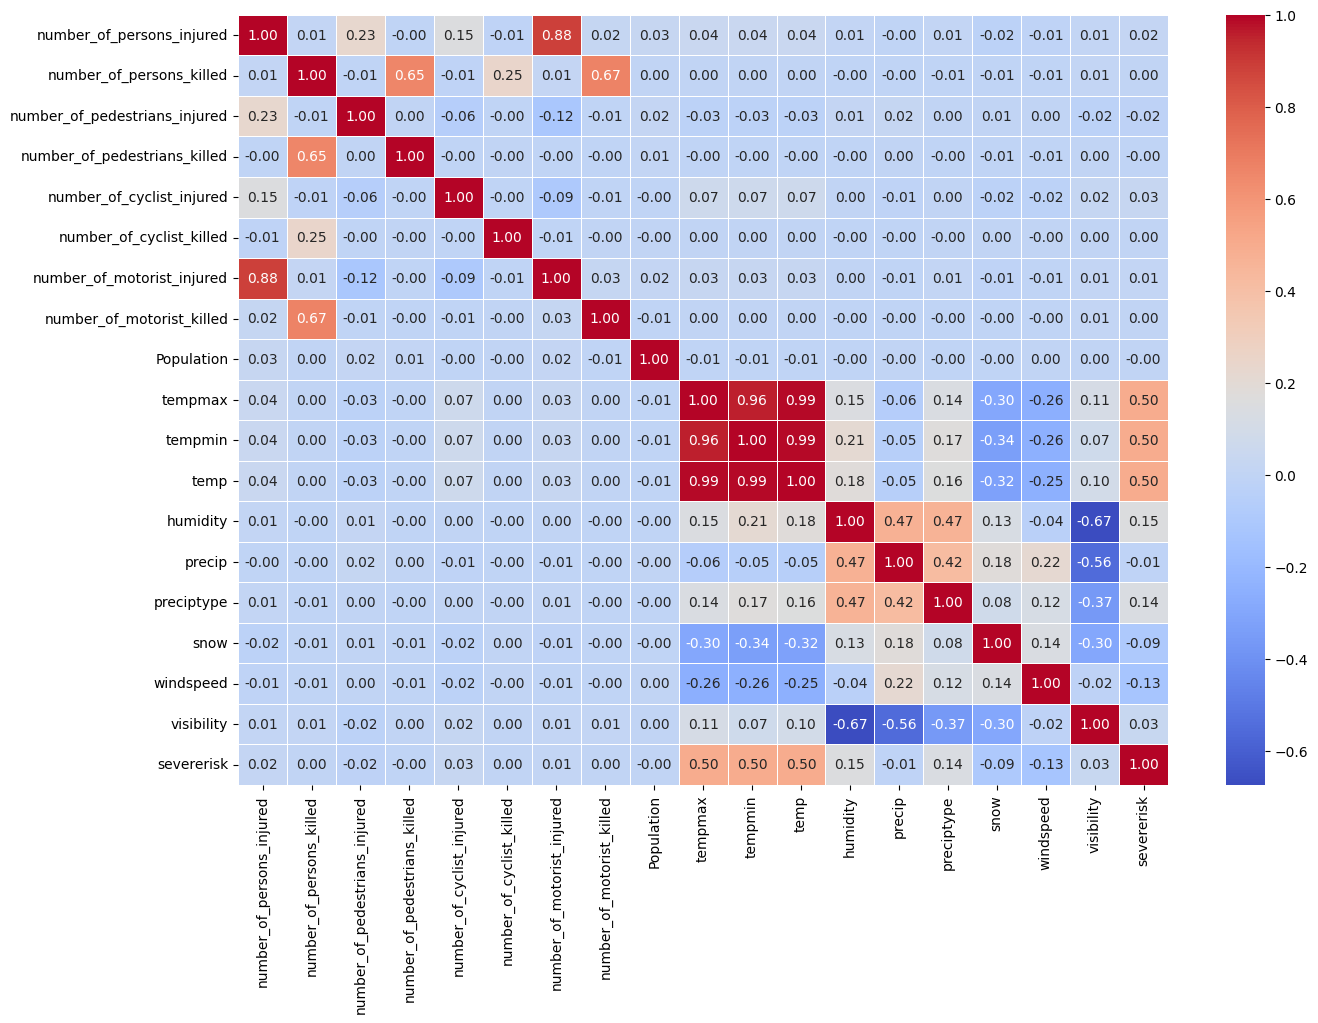

In [161]:
import pandas as pd

correlation_matrix = allzipcodes_weather_df.drop(["crash_day_of_week","year","month","hour","latitude","longitude","Population Density","death_rate","injuries_rate","number_of_deaths","number_of_injuries"],axis = 1).corr(numeric_only=True)

# Print or visualize the correlation matrix
print(correlation_matrix)

# Optionally, you can use seaborn to create a heatmap for better visualization
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.show()


In [164]:
allzipcodes_weather_df.groupby(allzipcodes_weather_df['zip_code']).size()

zip_code
10000     30
10001    590
10002    880
10003    415
10004     89
        ... 
11798      2
13367      1
13625      1
14092      1
14487      1
Length: 238, dtype: int64

In [162]:
unique_zipcodes = allzipcodes_weather_df['zip_code'].value_counts()
single_occurrence_zipcodes = unique_zipcodes[unique_zipcodes == 1].index
single_occurrence_zipcodes


Index(['10111', '10045', '10103', '13367', '10603', '10154', '11003', '10120',
       '11021', '10055', '10176', '10105', '11351', '10158', '10550', '14092',
       '10153', '10107', '10174', '11695', '10123', '10165', '10041', '10104',
       '10048', '11580', '14487', '11010', '11596', '13625', '11729'],
      dtype='object', name='zip_code')

In [58]:
weather_conditions = ['rain', 'cloudy', 'clear-day', 'snow']
precip_conditions= ['Dry', 'Light', 'Moderate', 'Heavy']
temp_conditions = ['Freezing Cold', 'Cold', 'Moderate', 'Warm', 'Hot']
humid_conditions = ['Low', 'High', 'Very High']
wind_conditions = ['Flags ripple', 'Flags wave', 'Leaves scatter', 'Small trees sway', 'Umbrellas not working']

Create a heatmap between weather info and contributing factors

In [163]:
top_contributing_factors = allzipcodes_weather_df['contributing_factor'][~allzipcodes_weather_df['contributing_factor'].isin(["Unspecified", "Other Vehicular"])].value_counts(normalize=True).head(10).index
top_contributing_factors = top_contributing_factors.to_list()
top_contributing_factors

['Driver Inattention/Distraction',
 'Failure to Yield Right-of-Way',
 'Following Too Closely',
 'Passing or Lane Usage Improper',
 'Passing Too Closely',
 'Unsafe Speed',
 'Backing Unsafely',
 'Traffic Control Disregarded',
 'Turning Improperly',
 'Unsafe Lane Changing']

These collection of graphs presents a comprehensive view of weather conditions associated with accident data in ZIP Code 10000. The precipitation graph indicates that dry conditions are most common during accidents, with a notable decrease in accident counts as precipitation increases. Temperature-related accidents are fairly distributed across 'Freezing Cold', 'Cold', and 'Moderate' categories, with fewer occurring in 'Warm' and 'Hot' conditions. High humidity seems to be the most prevalent condition in accidents, suggesting a possible impact on road safety. Wind levels mostly result in accidents when flags wave or leaves scatter, which are moderate wind conditions. Snow-related accidents are overwhelmingly more frequent when there is no snow, and visibility is predominantly high during most accidents, indicating that poor visibility is less commonly a contributing factor. The data suggests that most accidents occur under moderate weather conditions, with extreme weather being less commonly associated with accidents in this particular ZIP code.

In [170]:
## select all the rows related to zipcode = 10002
zipcode_weather_df = allzipcodes_weather_df[allzipcodes_weather_df['zip_code'] == '10002']
zipcode_weather_df

,crash_datetime,crash_day_of_week,crash_hour_category,street_address,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,...,windspeed,visibility,severerisk,sunrise,sunset,icon,temperature_category,precip_category,humid_category,wind_level
row_id,,,,,,,,,,,,,,,,,,,,,
10002_2022-03-26,2022-03-26 23:17:00,5,Late Night,Essex Street & East Houston Street,1,0,0,0,0,0,...,14.2,9.9,10.0,06:49,19:14,rain,Moderate,Light,High,Leaves scatter
10002_2022-03-26,2022-03-26 05:43:00,5,Early Morning,Grand Street & Essex Street,0,0,0,0,0,0,...,14.2,9.9,10.0,06:49,19:14,rain,Moderate,Light,High,Leaves scatter
10002_2022-03-26,2022-03-26 22:00:00,5,Late Night,138 Delancey Street,0,0,0,0,0,0,...,14.2,9.9,10.0,06:49,19:14,rain,Moderate,Light,High,Leaves scatter
10002_2022-03-25,2022-03-25 08:30:00,4,Rush Hours,Catherine Slip & South Street,0,0,0,0,0,0,...,17.8,9.4,10.0,06:51,19:13,rain,Moderate,Light,High,Leaves scatter
10002_2022-03-27,2022-03-27 22:25:00,6,Late Night,Delancey Street & Ludlow Street,1,0,0,0,1,0,...,18.2,9.9,10.0,06:47,19:15,cloudy,Moderate,Dry,High,Small trees sway
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10002_2022-12-31,2022-12-31 20:15:00,5,Other Hours,Stanton Street & Clinton Street,1,0,1,0,0,0,...,6.1,4.5,10.0,07:20,16:38,rain,Moderate,Moderate,Very High,Flags ripple
10002_2022-12-28,2022-12-28 00:00:00,2,Late Night,219 Madison Street,0,0,0,0,0,0,...,11.4,9.9,10.0,07:19,16:36,cloudy,Moderate,Dry,Low,Flags wave
10002_2022-12-30,2022-12-30 15:06:00,4,Other Hours,Delancey Street & Clinton Street,1,0,0,0,0,0,...,6.7,9.5,10.0,07:19,16:37,cloudy,Moderate,Dry,Low,Flags ripple


In [166]:
# Filter data for rainy, non-rainy, and snowy days
rainy_days = zipcode_weather_df[zipcode_weather_df['icon'] == 'rain']
cloudy_days = zipcode_weather_df[zipcode_weather_df['icon'] == 'cloudy']
clear_days = zipcode_weather_df[zipcode_weather_df['icon'] == 'clear-day']
snowy_days = zipcode_weather_df[zipcode_weather_df['icon'] == 'snow']

# Calculate the ratio of each severity level to total accidents for each condition
ratio_rainy = rainy_days['contributing_factor'][rainy_days['contributing_factor'].isin(top_contributing_factors)].value_counts(normalize=True)
ratio_cloudy= cloudy_days['contributing_factor'][cloudy_days['contributing_factor'].isin(top_contributing_factors)].value_counts(normalize=True)
ratio_clear= clear_days['contributing_factor'][clear_days['contributing_factor'].isin(top_contributing_factors)].value_counts(normalize=True) 
ratio_snowy= snowy_days['contributing_factor'][snowy_days['contributing_factor'].isin(top_contributing_factors)].value_counts(normalize=True) 

weather_data = {}
# Create a DataFrame for the heatmap
for factor in top_contributing_factors: 
    weather_data[factor] = [ratio_rainy.get(factor, 0), ratio_cloudy.get(factor, 0), ratio_clear.get(factor, 0), ratio_snowy.get(factor, 0)]

heatmap_data_weather_cf = pd.DataFrame(weather_data, index=['rainy', 'cloudy', 'clear', 'snowy'])
heatmap_data_weather_cf

,Driver Inattention/Distraction,Failure to Yield Right-of-Way,Following Too Closely,Passing or Lane Usage Improper,Passing Too Closely,Unsafe Speed,Backing Unsafely,Traffic Control Disregarded,Turning Improperly,Unsafe Lane Changing
rainy,0.542373,0.093220,0.055085,0.067797,0.033898,0.029661,0.055085,0.050847,0.046610,0.025424
cloudy,0.592593,0.103704,0.022222,0.081481,0.022222,0.029630,0.059259,0.044444,0.022222,0.022222
clear,0.579439,0.056075,0.084112,0.046729,0.074766,0.037383,0.056075,0.037383,0.009346,0.018692
snowy,0.764706,0.058824,0.058824,0.058824,0.000000,0.000000,0.000000,0.000000,0.058824,0.000000


In [167]:
# Filter data for different precipitation levels
dry_days = zipcode_weather_df[zipcode_weather_df['precip_category'] == 'Dry']
light_days = zipcode_weather_df[zipcode_weather_df['precip_category'] == 'Light']
moderate_days = zipcode_weather_df[zipcode_weather_df['precip_category'] == 'Moderate']
heavy_days = zipcode_weather_df[zipcode_weather_df['precip_category'] == 'Heavy']

# Calculate the ratio of each severity level to total accidents for each condition
ratio_dry = dry_days['contributing_factor'][dry_days['contributing_factor'].isin(top_contributing_factors)].value_counts(normalize=True)
ratio_light = light_days['contributing_factor'][light_days['contributing_factor'].isin(top_contributing_factors)].value_counts(normalize=True)
ratio_moderate = moderate_days['contributing_factor'][moderate_days['contributing_factor'].isin(top_contributing_factors)].value_counts(normalize=True)
ratio_heavy = heavy_days['contributing_factor'][heavy_days['contributing_factor'].isin(top_contributing_factors)].value_counts(normalize=True)

# Create a DataFrame for the heatmap
precip_data = {}
for factor in top_contributing_factors:
    precip_data[factor] = [ratio_dry.get(factor, 0), ratio_light.get(factor, 0), ratio_moderate.get(factor, 0), ratio_heavy.get(factor, 0)]

heatmap_data_precip_cf = pd.DataFrame(precip_data, index=['Dry', 'Light', 'Moderate', 'Heavy'])

# Filter data for different temperature levels
fc_days = zipcode_weather_df[zipcode_weather_df['temperature_category'] == 'Freezing Cold']
cold_days = zipcode_weather_df[zipcode_weather_df['temperature_category'] == 'Cold']
mod_days = zipcode_weather_df[zipcode_weather_df['temperature_category'] == 'Moderate']
warm_days = zipcode_weather_df[zipcode_weather_df['temperature_category'] == 'Warm']
hot_days = zipcode_weather_df[zipcode_weather_df['temperature_category'] == 'Hot']

# Calculate the ratio of each severity level to total accidents for each condition
ratio_fc_temp = fc_days['contributing_factor'][fc_days['contributing_factor'].isin(top_contributing_factors)].value_counts(normalize=True)
ratio_cold_temp = cold_days['contributing_factor'][cold_days['contributing_factor'].isin(top_contributing_factors)].value_counts(normalize=True)
ratio_mod_temp = mod_days['contributing_factor'][mod_days['contributing_factor'].isin(top_contributing_factors)].value_counts(normalize=True)
ratio_warm_temp = warm_days['contributing_factor'][warm_days['contributing_factor'].isin(top_contributing_factors)].value_counts(normalize=True)
ratio_hot_temp = hot_days['contributing_factor'][hot_days['contributing_factor'].isin(top_contributing_factors)].value_counts(normalize=True)

# Create a DataFrame for the heatmap
temp_data = {}
for factor in top_contributing_factors:
    temp_data[factor] = [ratio_fc_temp.get(factor, 0), ratio_cold_temp.get(factor, 0), ratio_mod_temp.get(factor, 0), ratio_warm_temp.get(factor, 0), ratio_hot_temp.get(factor, 0)]

heatmap_data_temp_cf = pd.DataFrame(temp_data, index=['Freezing Cold', 'Cold', 'Moderate', 'Warm', 'Hot'])


# Filter data for different humidity levels
low_humid = zipcode_weather_df[zipcode_weather_df['humid_category'] == 'Low']
high_humid = zipcode_weather_df[zipcode_weather_df['humid_category'] == 'High']
very_high_humid = zipcode_weather_df[zipcode_weather_df['humid_category'] == 'Very High']

# Calculate the ratio of each severity level to total accidents for each condition
ratio_low_humid = low_humid['contributing_factor'][low_humid['contributing_factor'].isin(top_contributing_factors)].value_counts(normalize=True)
ratio_high_humid = high_humid['contributing_factor'][high_humid['contributing_factor'].isin(top_contributing_factors)].value_counts(normalize=True)
ratio_very_high_humid = very_high_humid['contributing_factor'][very_high_humid['contributing_factor'].isin(top_contributing_factors)].value_counts(normalize=True)

# Create a DataFrame for the heatmap
humid_data = {}
for factor in top_contributing_factors:
    humid_data[factor] = [ratio_low_humid.get(factor, 0), ratio_high_humid.get(factor, 0), ratio_very_high_humid.get(factor, 0)]

heatmap_data_humid_cf = pd.DataFrame(humid_data, index=['Low', 'High', 'Very High'])

# Filter data for different wind levels
flags_ripple = zipcode_weather_df[zipcode_weather_df['wind_level'] == 'Flags ripple']
flags_wave = zipcode_weather_df[zipcode_weather_df['wind_level'] == 'Flags wave']
leaves_scatter = zipcode_weather_df[zipcode_weather_df['wind_level'] == 'Leaves scatter']
small_trees_sway = zipcode_weather_df[zipcode_weather_df['wind_level'] == 'Small trees sway']
umbrellas_not_working = zipcode_weather_df[zipcode_weather_df['wind_level'] == 'Umbrellas not working']

# Calculate the ratio of each severity level to total accidents for each condition
ratio_flags_ripple = flags_ripple['contributing_factor'][flags_ripple['contributing_factor'].isin(top_contributing_factors)].value_counts(normalize=True)
ratio_flags_wave = flags_wave['contributing_factor'][flags_wave['contributing_factor'].isin(top_contributing_factors)].value_counts(normalize=True)
ratio_leaves_scatter = leaves_scatter['contributing_factor'][leaves_scatter['contributing_factor'].isin(top_contributing_factors)].value_counts(normalize=True)
ratio_small_trees_sway = small_trees_sway['contributing_factor'][small_trees_sway['contributing_factor'].isin(top_contributing_factors)].value_counts(normalize=True)
ratio_umbrellas_not_working = umbrellas_not_working['contributing_factor'][umbrellas_not_working['contributing_factor'].isin(top_contributing_factors)].value_counts(normalize=True)

# Create a DataFrame for the heatmap
wind_data = {}
for factor in top_contributing_factors:
    wind_data[factor] = [ratio_flags_ripple.get(factor, 0), ratio_flags_wave.get(factor, 0), ratio_leaves_scatter.get(factor, 0), ratio_small_trees_sway.get(factor, 0), ratio_umbrellas_not_working.get(factor, 0)]

heatmap_data_wind_cf = pd.DataFrame(wind_data, index=['Flags ripple', 'Flags wave', 'Leaves scatter', 'Small trees sway', 'Umbrellas not working'])


In [178]:
print(zipcode_weather_df['zip_code'].unique()[0])

10002


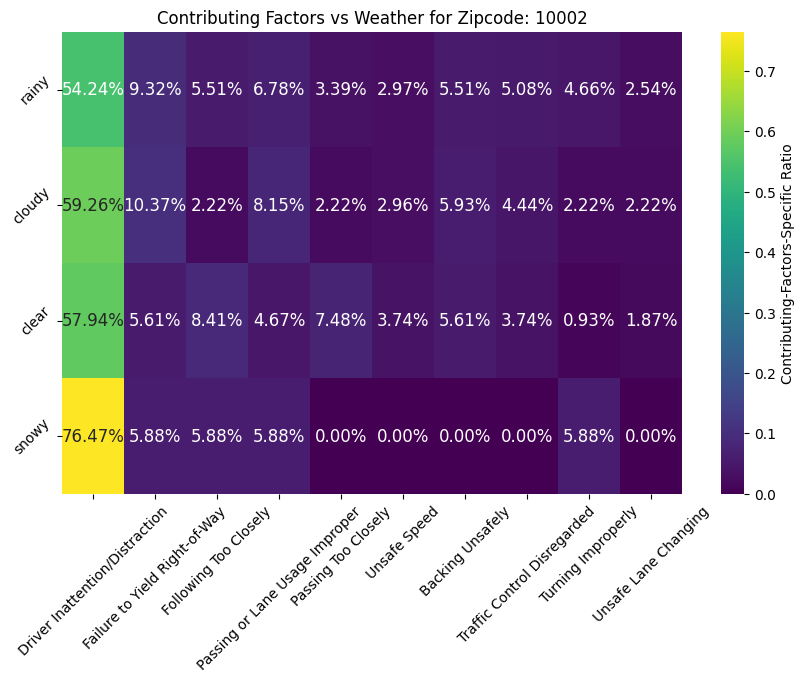

In [180]:
# Set up the first plot that shows the overall impact of weather on contributing factors
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data_weather_cf, annot = True, fmt='.2%', cmap='viridis', cbar_kws={'label': 'Contributing-Factors-Specific Ratio'},
            annot_kws={"size": 12})
plt.title('Contributing Factors vs Weather for Zipcode: '+ zipcode_weather_df['zip_code'].unique()[0])
plt.tick_params(axis='y', rotation=45) 
plt.tick_params(axis='x', rotation=45) 
plt.show()

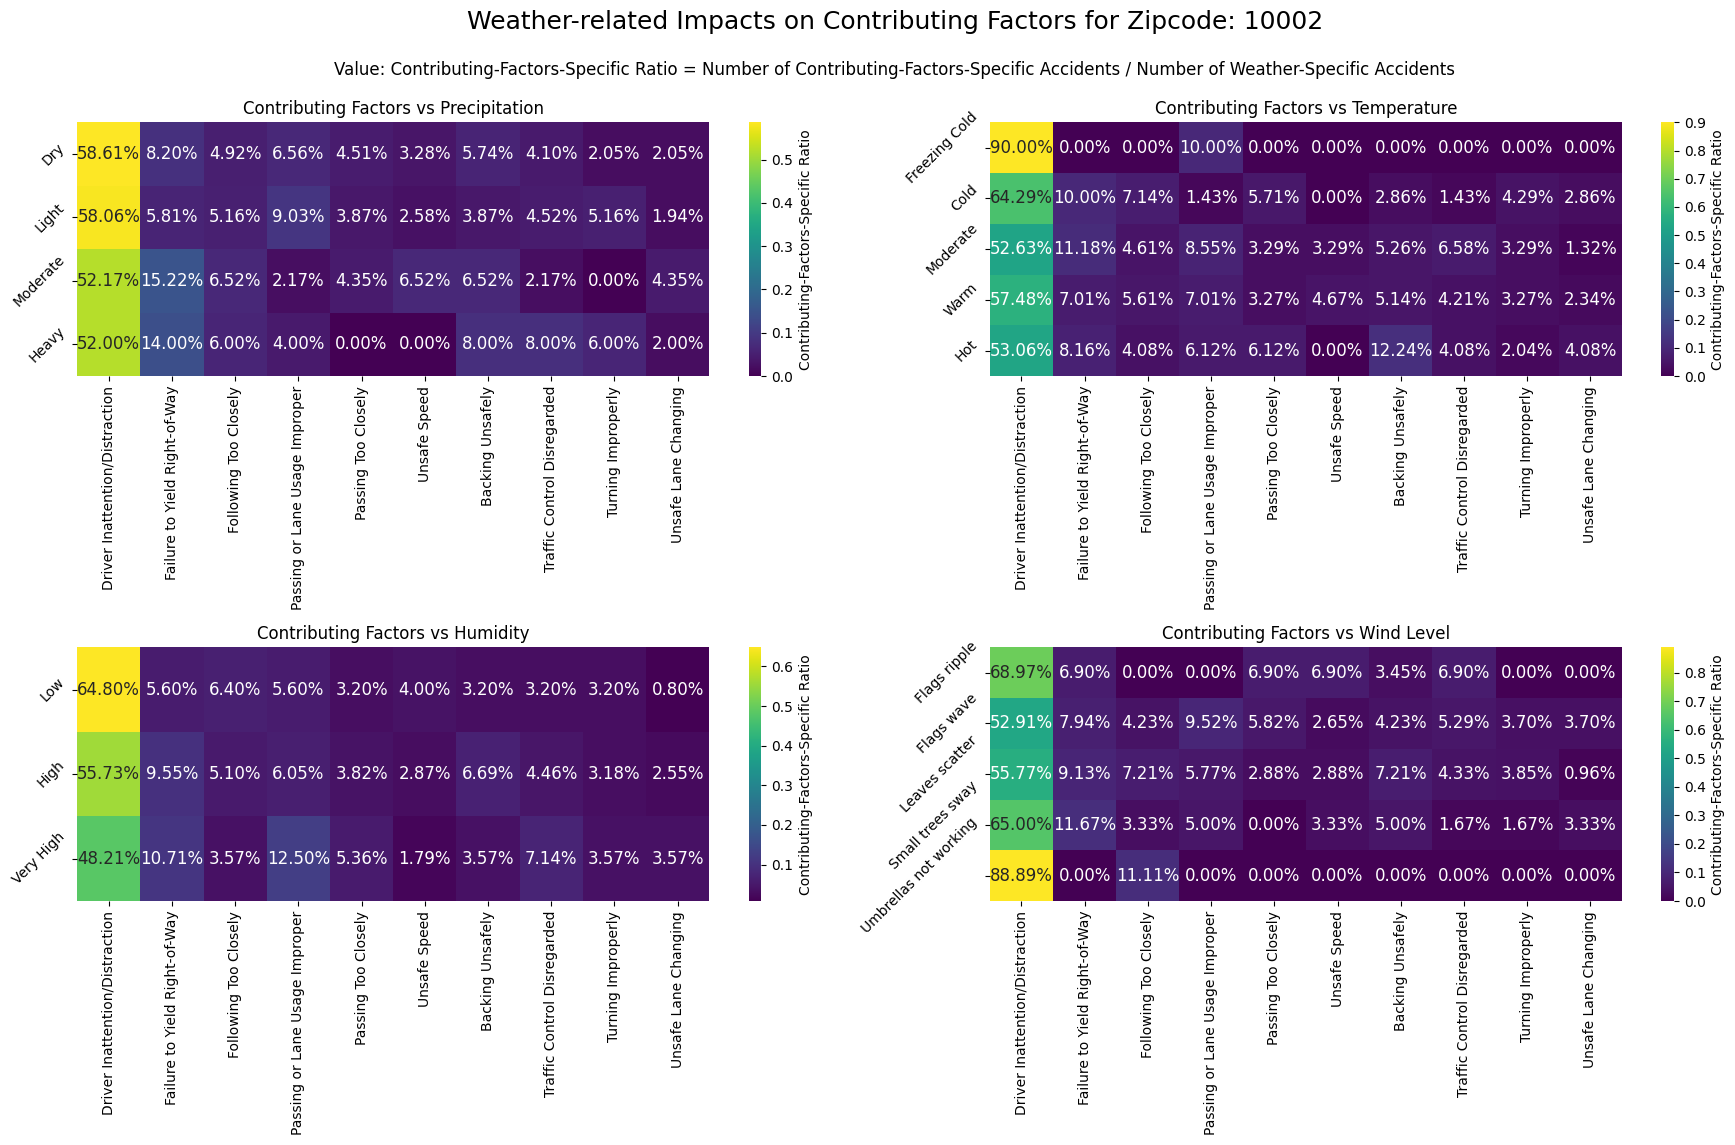

In [181]:
# Set up the plot for other weater details
# Set up the grid layout
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle('Weather-related Impacts on Contributing Factors for Zipcode: '+ zipcode_weather_df['zip_code'].unique()[0], fontsize=18)
fig.text(0.5, 0.93, 'Value: Contributing-Factors-Specific Ratio = Number of Contributing-Factors-Specific Accidents / Number of Weather-Specific Accidents',
         ha='center', va='center', fontsize=12)

sns.heatmap(heatmap_data_precip_cf, annot=True, fmt='.2%', cmap='viridis', cbar_kws={'label': 'Contributing-Factors-Specific Ratio'},
            annot_kws={"size": 12}, ax = axes[0,0])
axes[0, 0].set_title('Contributing Factors vs Precipitation')
axes[0, 0].tick_params(axis='y', rotation=45) 

sns.heatmap(heatmap_data_temp_cf, annot=True, fmt='.2%', cmap='viridis', cbar_kws={'label': 'Contributing-Factors-Specific Ratio'}, 
            annot_kws={"size": 12},ax = axes[0,1])
axes[0, 1].set_title('Contributing Factors vs Temperature')
axes[0, 1].tick_params(axis='y', rotation=45)  

sns.heatmap(heatmap_data_humid_cf, annot=True, fmt='.2%', cmap='viridis', cbar_kws={'label': 'Contributing-Factors-Specific Ratio'}, 
            annot_kws={"size": 12}, ax = axes[1,0])

axes[1, 0].set_title('Contributing Factors vs Humidity')
axes[1, 0].tick_params(axis='y', rotation=45)  

sns.heatmap(heatmap_data_wind_cf, annot=True, fmt='.2%', cmap='viridis', cbar_kws={'label': 'Contributing-Factors-Specific Ratio'}, 
            annot_kws={"size": 12}, ax = axes[1,1])
axes[1, 1].set_title('Contributing Factors vs Wind Level')
axes[1, 1].tick_params(axis='y', rotation=45)  

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


Create a heatmap between weather info and severity of accidents

In [127]:
# Filter data for rainy, non-rainy, and snowy days
rainy_days = zipcode_weather_df[zipcode_weather_df['icon'] == 'rain']
cloudy_days = zipcode_weather_df[zipcode_weather_df['icon'] == 'cloudy']
clear_days = zipcode_weather_df[zipcode_weather_df['icon'] == 'clear-day']
snowy_days = zipcode_weather_df[zipcode_weather_df['icon'] == 'snow']

# Calculate the ratio of each severity level to total accidents for each condition
ratio_rainy = rainy_days['severity_of_accident'].value_counts(normalize=True)
ratio_cloudy = cloudy_days['severity_of_accident'].value_counts(normalize=True)
ratio_clear = clear_days['severity_of_accident'].value_counts(normalize=True)
ratio_snowy = snowy_days['severity_of_accident'].value_counts(normalize=True)

# Create a DataFrame for the heatmap
weather_data = {
    'Very Fatal': [ratio_rainy.get('Very Fatal', 0), ratio_cloudy.get('Very Fatal', 0), ratio_clear.get('Very Fatal', 0), ratio_snowy.get('Very Fatal', 0)],
    'Fatal': [ratio_rainy.get('Fatal', 0), ratio_cloudy.get('Fatal', 0), ratio_clear.get('Fatal', 0), ratio_snowy.get('Fatal', 0)],
    'Serious (High)': [ratio_rainy.get('Serious (High)', 0), ratio_cloudy.get('Serious (High)', 0), ratio_clear.get('Serious (High)', 0), ratio_snowy.get('Serious (High)', 0)],
    'Serious (Medium)': [ratio_rainy.get('Serious (Medium)', 0), ratio_cloudy.get('Serious (Medium)', 0), ratio_clear.get('Serious (Medium)', 0), ratio_snowy.get('Serious (Medium)', 0)],
    'Serious (Low)': [ratio_rainy.get('Serious (Low)', 0), ratio_cloudy.get('Serious (Low)', 0), ratio_clear.get('Serious (Low)', 0), ratio_snowy.get('Serious (Low)', 0)],
    'Minor': [ratio_rainy.get('Minor', 0), ratio_cloudy.get('Minor', 0), ratio_clear.get('Minor', 0), ratio_snowy.get('Minor', 0)],
}

heatmap_data_weather = pd.DataFrame(weather_data, index=['rainy', 'cloudy', 'clear', 'snowy'])
heatmap_data_weather

,Very Fatal,Fatal,Serious (High),Serious (Medium),Serious (Low),Minor
rainy,0.000000,0.002488,0.003786,0.022460,0.356360,0.614905
cloudy,0.000000,0.002713,0.003391,0.022833,0.347086,0.623978
clear,0.000275,0.002910,0.003107,0.022102,0.351620,0.619986
snowy,0.000209,0.001043,0.002085,0.018766,0.300667,0.677231


In [103]:
# Filter data by precipitation level
dry_days = zipcode_weather_df[zipcode_weather_df['precip_category'] == 'Dry']
light_days = zipcode_weather_df[zipcode_weather_df['precip_category'] == 'Light']
moderate_days = zipcode_weather_df[zipcode_weather_df['precip_category'] == 'Moderate']
heavy_days = zipcode_weather_df[zipcode_weather_df['precip_category'] == 'Heavy']

# Calculate the ratio of each severity level to total accidents for each condition
ratio_dry = dry_days['severity_of_accident'].value_counts(normalize=True)
ratio_light = light_days['severity_of_accident'].value_counts(normalize=True)
ratio_moderate = moderate_days['severity_of_accident'].value_counts(normalize=True)
ratio_heavy = heavy_days['severity_of_accident'].value_counts(normalize=True)

# Create a DataFrame for the heatmap
precip_data = {
    'Very Fatal': [ratio_dry.get('Very Fatal', 0), ratio_light.get('Very Fatal', 0), ratio_moderate.get('Very Fatal', 0), ratio_heavy.get('Very Fatal', 0)],
    'Fatal': [ratio_dry.get('Fatal', 0), ratio_light.get('Fatal', 0), ratio_moderate.get('Fatal', 0), ratio_heavy.get('Fatal', 0)],
    'Serious (High)': [ratio_dry.get('Serious (High)', 0), ratio_light.get('Serious (High)', 0), ratio_moderate.get('Serious (High)', 0), ratio_heavy.get('Serious (High)', 0)],
    'Serious (Medium)': [ratio_dry.get('Serious (Medium)', 0), ratio_light.get('Serious (Medium)', 0), ratio_moderate.get('Serious (Medium)', 0), ratio_heavy.get('Serious (Medium)', 0)],
    'Serious (Low)': [ratio_dry.get('Serious (Low)', 0), ratio_light.get('Serious (Low)', 0), ratio_moderate.get('Serious (Low)', 0), ratio_heavy.get('Serious (Low)', 0)],
    'Minor': [ratio_dry.get('Minor', 0), ratio_light.get('Minor', 0), ratio_moderate.get('Minor', 0), ratio_heavy.get('Minor', 0)],
}

heatmap_data_precip = pd.DataFrame(precip_data, index=['Dry', 'Light', 'Moderate', 'Heavy'])

# Filter data by temperature level
fc_days = zipcode_weather_df[zipcode_weather_df['temperature_category'] == 'Freezing Cold']
cold_days = zipcode_weather_df[zipcode_weather_df['temperature_category'] == 'Cold']
mod_days = zipcode_weather_df[zipcode_weather_df['temperature_category'] == 'Moderate']
warm_days = zipcode_weather_df[zipcode_weather_df['temperature_category'] == 'Warm']
hot_days = zipcode_weather_df[zipcode_weather_df['temperature_category'] == 'Hot']

# Calculate the ratio of each severity level to total accidents for each condition
ratio_fc = fc_days['severity_of_accident'].value_counts(normalize=True)
ratio_cold = cold_days['severity_of_accident'].value_counts(normalize=True)
ratio_mod = mod_days['severity_of_accident'].value_counts(normalize=True)
ratio_warm = warm_days['severity_of_accident'].value_counts(normalize=True)
ratio_hot = hot_days['severity_of_accident'].value_counts(normalize=True)

# Create a DataFrame for the heatmap
temp_data = {
    'Very Fatal': [ratio_fc.get('Very Fatal', 0), ratio_cold.get('Very Fatal', 0), ratio_mod.get('Very Fatal', 0), ratio_warm.get('Very Fatal', 0), ratio_hot.get('Very Fatal', 0)],
    'Fatal': [ratio_fc.get('Fatal', 0), ratio_cold.get('Fatal', 0), ratio_mod.get('Fatal', 0), ratio_warm.get('Fatal', 0), ratio_hot.get('Fatal', 0)],
    'Serious (High)': [ratio_fc.get('Serious (High)', 0), ratio_cold.get('Serious (High)', 0), ratio_mod.get('Serious (High)', 0), ratio_warm.get('Serious (High)', 0), ratio_hot.get('Serious (High)', 0)],
    'Serious (Medium)': [ratio_fc.get('Serious (Medium)', 0), ratio_cold.get('Serious (Medium)', 0), ratio_mod.get('Serious (Medium)', 0), ratio_warm.get('Serious (Medium)', 0), ratio_hot.get('Serious (Medium)', 0)],
    'Serious (Low)': [ratio_fc.get('Serious (Low)', 0), ratio_cold.get('Serious (Low)', 0), ratio_mod.get('Serious (Low)', 0), ratio_warm.get('Serious (Low)', 0), ratio_hot.get('Serious (Low)', 0)],
    'Minor': [ratio_fc.get('Minor', 0), ratio_cold.get('Minor', 0), ratio_mod.get('Minor', 0), ratio_warm.get('Minor', 0), ratio_hot.get('Minor', 0)],
}

heatmap_data_temp = pd.DataFrame(temp_data, index=['Freezing Cold', 'Cold', 'Moderate', 'Warm', 'Hot'])

# Filter data by humidity level
low_humid = zipcode_weather_df[zipcode_weather_df['humid_category'] == 'Low']
high_humid = zipcode_weather_df[zipcode_weather_df['humid_category'] == 'High']
very_high_humid = zipcode_weather_df[zipcode_weather_df['humid_category'] == 'Very High']

# Calculate the ratio of each severity level to total accidents for each condition
ratio_low = low_humid['severity_of_accident'].value_counts(normalize=True)
ratio_high = high_humid['severity_of_accident'].value_counts(normalize=True)
ratio_veryhigh = very_high_humid['severity_of_accident'].value_counts(normalize=True)

# Create a DataFrame for the heatmap
humid_data = {
    'Very Fatal': [ratio_low.get('Very Fatal', 0), ratio_high.get('Very Fatal', 0), ratio_veryhigh.get('Very Fatal', 0)],
    'Fatal': [ratio_low.get('Fatal', 0), ratio_high.get('Fatal', 0), ratio_veryhigh.get('Fatal', 0)],
    'Serious (High)': [ratio_low.get('Serious (High)', 0), ratio_high.get('Serious (High)', 0), ratio_veryhigh.get('Serious (High)', 0)],
    'Serious (Medium)': [ratio_low.get('Serious (Medium)', 0), ratio_high.get('Serious (Medium)', 0), ratio_veryhigh.get('Serious (Medium)', 0)],
    'Serious (Low)': [ratio_low.get('Serious (Low)', 0), ratio_high.get('Serious (Low)', 0), ratio_veryhigh.get('Serious (Low)', 0)],
    'Minor': [ratio_low.get('Minor', 0), ratio_high.get('Minor', 0), ratio_veryhigh.get('Minor', 0)],
}

heatmap_data_humid = pd.DataFrame(humid_data, index=['Low', 'High', 'Very High'])

# Filter data by wind level
flags_ripple = zipcode_weather_df[zipcode_weather_df['wind_level'] == 'Flags ripple']
flags_wave = zipcode_weather_df[zipcode_weather_df['wind_level'] == 'Flags wave']
leaves_scatter = zipcode_weather_df[zipcode_weather_df['wind_level'] == 'Leaves scatter']
small_trees_sway = zipcode_weather_df[zipcode_weather_df['wind_level'] == 'Small trees sway']
umbrellas_not_working = zipcode_weather_df[zipcode_weather_df['wind_level'] == 'Umbrellas not working']

# Calculate the ratio of each severity level to total accidents for each condition
ratio_fr = flags_ripple['severity_of_accident'].value_counts(normalize=True)
ratio_fw = flags_wave['severity_of_accident'].value_counts(normalize=True)
ratio_ls = leaves_scatter['severity_of_accident'].value_counts(normalize=True)
ratio_sts = small_trees_sway['severity_of_accident'].value_counts(normalize=True)
ratio_unw = umbrellas_not_working['severity_of_accident'].value_counts(normalize=True)

# Create a DataFrame for the heatmap
wind_data = {
    'Very Fatal': [ratio_fr.get('Very Fatal', 0), ratio_fw.get('Very Fatal', 0), ratio_ls.get('Very Fatal', 0), ratio_sts.get('Very Fatal', 0), ratio_unw.get('Very Fatal', 0)],
    'Fatal': [ratio_fr.get('Fatal', 0), ratio_fw.get('Fatal', 0), ratio_ls.get('Fatal', 0), ratio_sts.get('Fatal', 0), ratio_unw.get('Fatal', 0)],
    'Serious (High)': [ratio_fr.get('Serious (High)', 0), ratio_fw.get('Serious (High)', 0), ratio_ls.get('Serious (High)', 0), ratio_sts.get('Serious (High)', 0), ratio_unw.get('Serious (High)', 0)],
    'Serious (Medium)': [ratio_fr.get('Serious (Medium)', 0), ratio_fw.get('Serious (Medium)', 0), ratio_ls.get('Serious (Medium)', 0), ratio_sts.get('Serious (Medium)', 0), ratio_unw.get('Serious (Medium)', 0)],
    'Serious (Low)': [ratio_fr.get('Serious (Low)', 0), ratio_fw.get('Serious (Low)', 0), ratio_ls.get('Serious (Low)', 0), ratio_sts.get('Serious (Low)', 0), ratio_unw.get('Serious (Low)', 0)],
    'Minor': [ratio_fr.get('Minor', 0), ratio_fw.get('Minor', 0), ratio_ls.get('Minor', 0), ratio_sts.get('Minor', 0), ratio_unw.get('Minor', 0)],
}

heatmap_data_wind = pd.DataFrame(wind_data, index=['Flags ripple', 'Flags wave', 'Leaves scatter', 'Small trees sway', 'Umbrellas not working'])


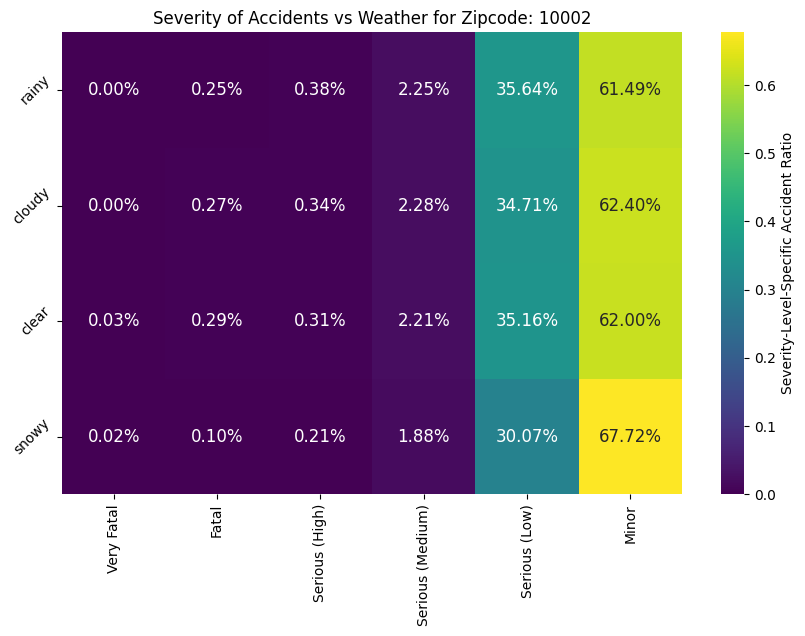

In [182]:
# Set up the first plot that shows the overall impact of weather on severity of accidents
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data_weather, annot = True, fmt='.2%', cmap='viridis', cbar_kws={'label': 'Severity-Level-Specific Accident Ratio'},
            annot_kws={"size": 12})
plt.title('Severity of Accidents vs Weather for Zipcode: '+ zipcode_weather_df['zip_code'].unique()[0])
plt.tick_params(axis='y', rotation=45) 
plt.show()

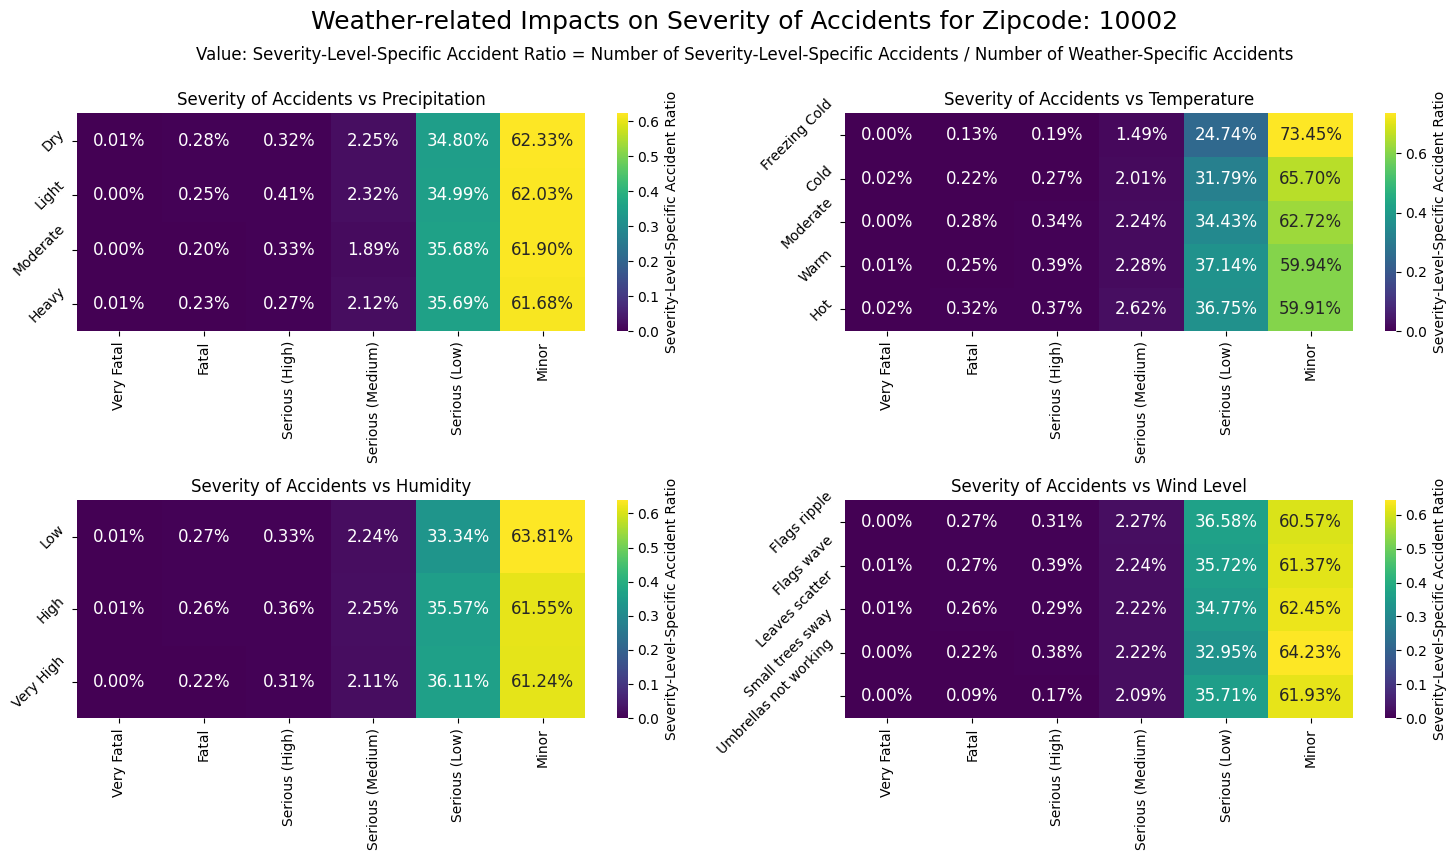

In [183]:
# Set up the plot for other weater details
# Set up the grid layout
fig, axes = plt.subplots(2, 2, figsize=(15, 9))
fig.suptitle('Weather-related Impacts on Severity of Accidents for Zipcode: '+ zipcode_weather_df['zip_code'].unique()[0], fontsize=18)
fig.text(0.5, 0.93, 'Value: Severity-Level-Specific Accident Ratio = Number of Severity-Level-Specific Accidents / Number of Weather-Specific Accidents',
         ha='center', va='center', fontsize=12)

sns.heatmap(heatmap_data_precip, annot=True, fmt='.2%', cmap='viridis', cbar_kws={'label': 'Severity-Level-Specific Accident Ratio'},
            annot_kws={"size": 12}, ax = axes[0,0])
axes[0, 0].set_title('Severity of Accidents vs Precipitation')
axes[0, 0].tick_params(axis='y', rotation=45) 

sns.heatmap(heatmap_data_temp, annot=True, fmt='.2%', cmap='viridis', cbar_kws={'label': 'Severity-Level-Specific Accident Ratio'}, 
            annot_kws={"size": 12},ax = axes[0,1])
axes[0, 1].set_title('Severity of Accidents vs Temperature')
axes[0, 1].tick_params(axis='y', rotation=45)  

sns.heatmap(heatmap_data_humid, annot=True, fmt='.2%', cmap='viridis', cbar_kws={'label': 'Severity-Level-Specific Accident Ratio'}, 
            annot_kws={"size": 12}, ax = axes[1,0])

axes[1, 0].set_title('Severity of Accidents vs Humidity')
axes[1, 0].tick_params(axis='y', rotation=45)  

sns.heatmap(heatmap_data_wind, annot=True, fmt='.2%', cmap='viridis', cbar_kws={'label': 'Severity-Level-Specific Accident Ratio'}, 
            annot_kws={"size": 12}, ax = axes[1,1])
axes[1, 1].set_title('Severity of Accidents vs Wind Level')
axes[1, 1].tick_params(axis='y', rotation=45)  
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


/Users/siyunyan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/siyunyan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/siyunyan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/siyunyan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Ca

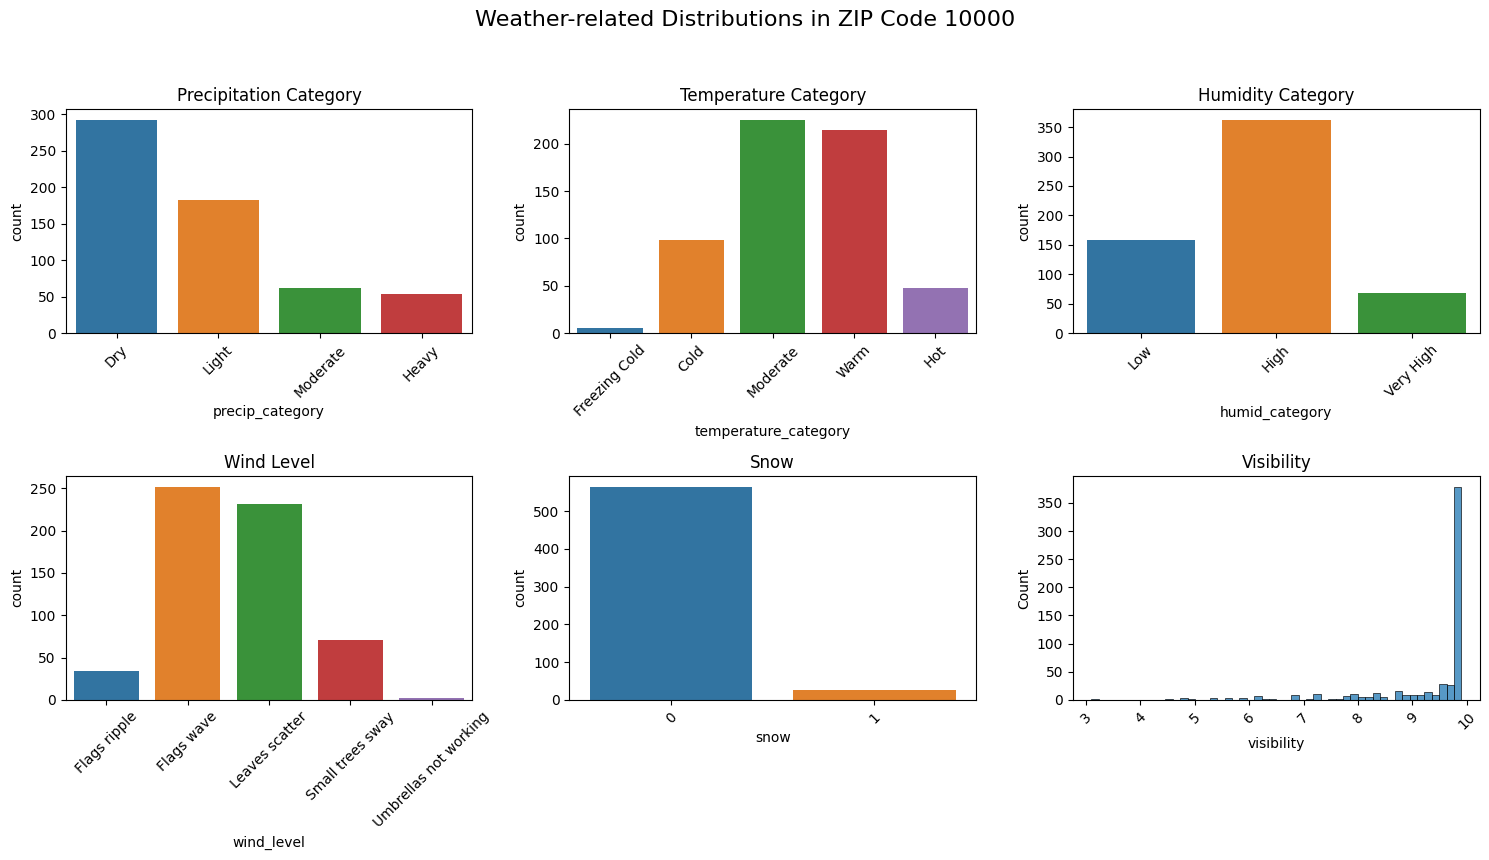

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data for ZIP code 10001
zip10001_df = zipcode_weather_df[zipcode_weather_df['zip_code'] == '10001']

# Set up the grid layout
fig, axes = plt.subplots(2, 3, figsize=(15, 9))
fig.suptitle('Weather-related Distributions in ZIP Code 10000', fontsize=16)

# Plot distribution of Precipitation Category
precip_order = ['Dry', 'Light', 'Moderate', 'Heavy']
sns.countplot(x='precip_category', data=zip10001_df, order=precip_order, ax=axes[0, 0])
axes[0, 0].set_title('Precipitation Category')
axes[0, 0].tick_params(axis='x', rotation=45)  # Set x-axis label orientation

# Plot distribution of Temperature Category
temp_order = ['Freezing Cold', 'Cold', 'Moderate', 'Warm', 'Hot']
sns.countplot(x='temperature_category', data=zip10001_df, order=temp_order, ax=axes[0, 1])
axes[0, 1].set_title('Temperature Category')
axes[0, 1].tick_params(axis='x', rotation=45)  # Set x-axis label orientation

# Plot distribution of Humidity Category
humid_order = ['Low', 'High', 'Very High']
sns.countplot(x='humid_category', data=zip10001_df, order=humid_order, ax=axes[0, 2])
axes[0, 2].set_title('Humidity Category')
axes[0, 2].tick_params(axis='x', rotation=45)  # Set x-axis label orientation

# Plot distribution of Wind Level
wind_order = ['Flags ripple', 'Flags wave', 'Leaves scatter', 'Small trees sway', 'Umbrellas not working']
sns.countplot(x='wind_level', data=zip10001_df, order=wind_order, ax=axes[1, 0])
axes[1, 0].set_title('Wind Level')
axes[1, 0].tick_params(axis='x', rotation=45)  # Set x-axis label orientation

# Plot distribution of Snow
sns.countplot(x='snow', data=zip10001_df, ax=axes[1, 1])
axes[1, 1].set_title('Snow')
axes[1, 1].tick_params(axis='x', rotation=45)  # Set x-axis label orientation

# Plot distribution of Visibility
sns.histplot(x='visibility', data=zip10001_df, ax=axes[1, 2])
axes[1, 2].set_title('Visibility')
axes[1, 2].tick_params(axis='x', rotation=45)  # Set x-axis label orientation

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Show the plot
plt.show()


In [105]:
merged_df["injuries/total"] = merged_df["number_of_injuries"]/merged_df["count"]
merged_df["deaths/total"] = merged_df["number_of_deaths"]/merged_df["count"]
merged_df["inflicted/total"] = (merged_df["number_of_injuries"]+merged_df["number_of_deaths"])/merged_df["count"]

/Users/siyunyan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/siyunyan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/siyunyan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


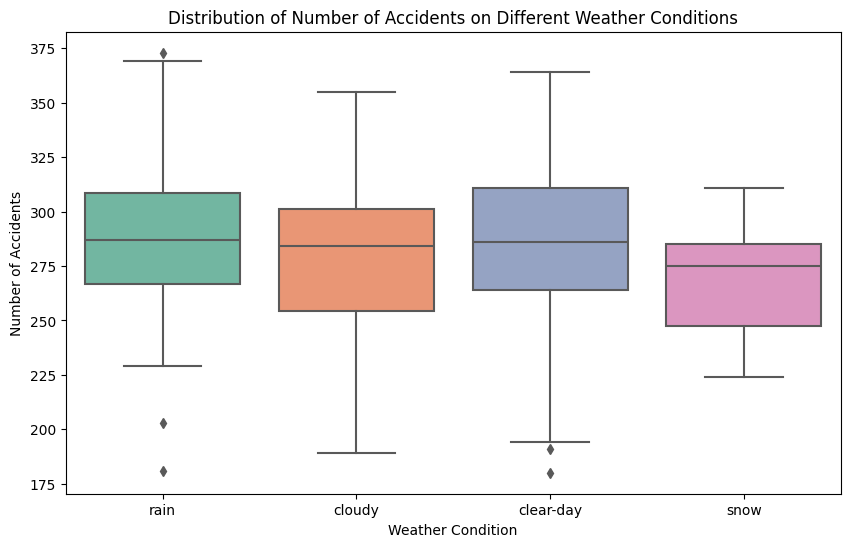

In [80]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Plot the distribution
plt.figure(figsize=(10, 6))
sns.boxplot(x='icon', y='count', data=merged_df, palette='Set2')
plt.title('Distribution of Number of Accidents on Different Weather Conditions')
plt.xlabel('Weather Condition')
plt.ylabel('Number of Accidents')
plt.show()


The boxplots illustrate the distribution of accident numbers under different weather conditions. Rain and cloudy weather show a wide range of accident counts, with rain exhibiting some outliers, indicating occasional spikes in accident numbers during such weather. Clear days have a relatively compact distribution but with a slight skew towards higher accident counts. Snowy conditions, while having fewer accidents overall, display a tight distribution with fewer outliers, suggesting a more consistent accident rate during such conditions. Overall, the variability in accident counts is greatest during rainy and cloudy weather, which could be due to the impact of these conditions on visibility and road surface conditions, affecting driving safety.

/Users/siyunyan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/siyunyan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/siyunyan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


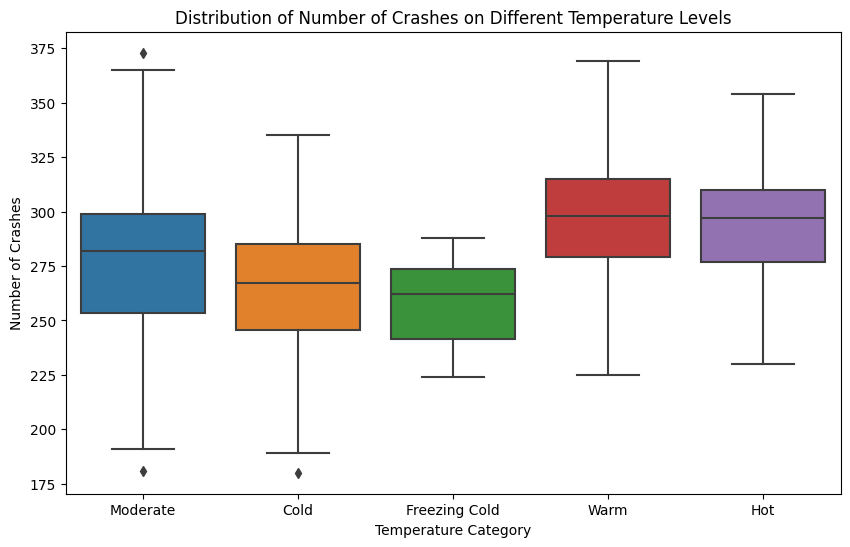

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt


# Set the size of the plot
plt.figure(figsize=(10, 6))

# Create a boxplot
sns.boxplot(x='temperature_category', y='count', data=merged_df)

# Set plot labels and title
plt.xlabel('Temperature Category')
plt.ylabel('Number of Crashes')
plt.title('Distribution of Number of Crashes on Different Temperature Levels')

# Show the plot
plt.show()


The boxplots visualize the distribution of crashes across different temperature levels. Moderate temperatures seem to have a higher median number of crashes compared to other categories, with a notable spread of data points indicating variability in crash frequency. Cold temperatures show a similar range of crash numbers, with outliers suggesting occasional spikes in crashes during colder weather. Freezing temperatures have the smallest interquartile range, indicating more consistent crash numbers, while warm and hot temperatures show a wider spread, with warm temperatures having a slightly higher median number of crashes. This information could suggest that driver behavior or road conditions at moderate to warm temperatures might contribute to higher crash frequencies.

/Users/siyunyan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/siyunyan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/siyunyan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/siyunyan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Ca

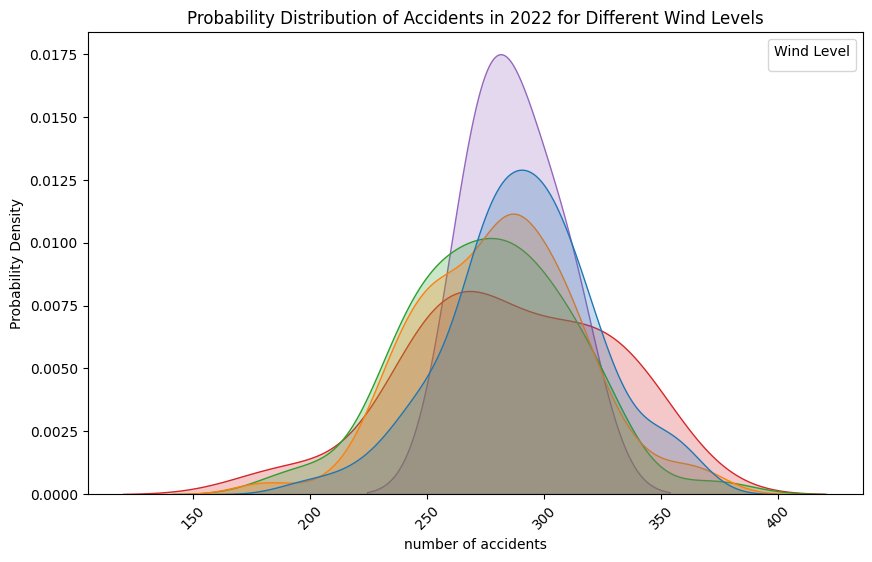

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt


# Plot the distribution using a kernel density estimate (KDE) for each wind level
plt.figure(figsize=(10, 6))
sns.kdeplot(data=merged_df, x='count', hue='wind_level', common_norm=False, fill=True)

# Set plot labels and title
plt.xlabel('number of accidents')
plt.ylabel('Probability Density')
plt.title('Probability Distribution of Accidents in 2022 for Different Wind Levels')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the legend
plt.legend(title='Wind Level', loc='upper right')

# Show the plot
plt.show()



The graph depicts the probability distribution of accidents for different wind levels throughout 2022. Each bell-shaped curve represents the likelihood of accident counts at varying wind intensities. The overlapping nature of the distributions suggests that there is no clear, singular effect of wind on the probability of accidents, as the ranges of accident numbers for different wind levels are quite similar. The peak of each distribution indicates the most probable number of accidents at a particular wind level, and the width of the curves reflects the variability of accidents associated with that wind level. Notably, no single wind level stands out as having a significantly different impact on the number of accidents, implying that wind may not be a decisive factor in the frequency of accidents.

In [151]:
len(merged_df)

365

In [157]:
collision_df.columns

Index(['crash_datetime', 'crash_day_of_week', 'crash_hour_category',
       'street_address', 'number_of_persons_injured',
       'number_of_persons_killed', 'number_of_pedestrians_injured',
       'number_of_pedestrians_killed', 'number_of_cyclist_injured',
       'number_of_cyclist_killed', 'number_of_motorist_injured',
       'number_of_motorist_killed', 'vehicle_type_code_1',
       'vehicle_type_code_2', 'borough', 'zip_code', 'latitude', 'longitude',
       'vehicle_type_code_3', 'vehicle_type_code_4', 'Population Density',
       'Population', 'contributing_factor', 'number_of_deaths',
       'number_of_injuries', 'death_rate', 'injuries_rate',
       'severity_of_accident', 'month', 'year', 'day_of_week', 'hour', 'date',
       'row_id'],
      dtype='object')

Build a SVM classifier model to predict severity of collision based on the collision info

In [158]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer


# Select relevant features and target variable
features = ['crash_day_of_week', 'crash_hour_category','vehicle_type_code_1',
       'vehicle_type_code_2','Population', 'contributing_factor']
target = 'severity_of_accident'

# Drop rows with missing target values
data = collision_df.dropna(subset=[target])

# Encode categorical features
label_encoder = LabelEncoder()
for feature in features:
    data[feature] = label_encoder.fit_transform(data[feature])

# Impute missing values
imputer = SimpleImputer(strategy='mean')
data[features] = imputer.fit_transform(data[features])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data[features], data[target], test_size=0.2, random_state=42)

# Initialize SVM model
svm_model = SVC()

# Train the model
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('\nClassification Report:')
print(classification_rep)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.6191646191646192

Classification Report:
                  precision    recall  f1-score   support

           Fatal       0.00      0.00      0.00        47
           Minor       0.62      1.00      0.76     12852
  Serious (High)       0.00      0.00      0.00        66
   Serious (Low)       0.00      0.00      0.00      7344
Serious (Medium)       0.00      0.00      0.00       446
      Very Fatal       0.00      0.00      0.00         2

        accuracy                           0.62     20757
       macro avg       0.10      0.17      0.13     20757
    weighted avg       0.38      0.62      0.47     20757



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
